## Ex 11.3

We try to obtain a fit for the function $$f(x,y) = \sin(x^2+y^2)$$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [3]:
def f(x,y):
    return np.sin((x ** 2 + y ** 2))

In [4]:
# generate training inputs
np.random.seed(0)

N_train = 10000 # <<< train
N_valid = 1000 # <<< test
sigma = 0.1

In [5]:
x_train = np.random.uniform(-3./2., 3./2., N_train)
x_valid = np.random.uniform(-3./2., 3./2., N_valid)

y_train = np.random.uniform(-3./2., 3./2., N_train)
y_valid = np.random.uniform(-3./2., 3./2., N_valid)

XY_train = np.column_stack((x_train,y_train))
XY_valid = np.column_stack((x_valid,y_valid))

z_target = f(x_valid, y_valid)
z_train = np.random.normal(f(x_train,y_train), sigma)
z_valid = np.random.normal(f(x_valid,y_valid), sigma)

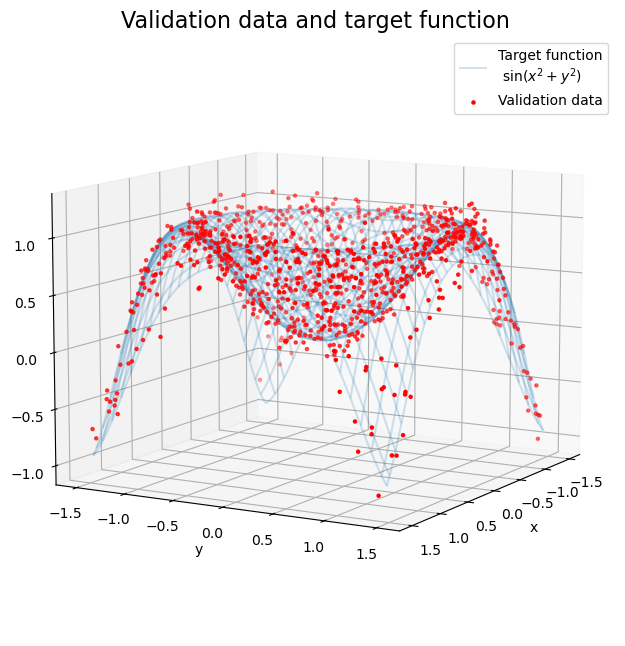

In [6]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-3./2., 3./2., 0.05)
y_surf = np.arange(-3./2., 3./2., 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf), label = 'Target function\n $\sin(x^2+y^2)$', alpha = 0.2)
ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label = 'Validation data')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Validation data and target function", fontsize = 16)
ax.legend()
ax.view_init(10, 30)

plt.show()

This time, the first layer will need an input of shape 2, as the function is 2-dimensional.

The activation function tanh will be used, as it seem to achieve slightly better results.

In [15]:
model = tf.keras.Sequential()
model.add(Dense(30, input_shape = (2,), activation = 'tanh'))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(30, activation = 'tanh'))
model.add(Dense(1, activation = 'tanh'))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
N_epochs=20
history = model.fit(    x = XY_train, y = z_train, 
                        batch_size = 32, epochs = N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle = True,                        
                        validation_data = (XY_valid, z_valid))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 30)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,841 (15.00 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2065 - mse: 0.2065 - val_loss: 0.1561 - val_mse: 0.1561
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1578 - mse: 0.1578 - val_loss: 0.1134 - val_mse: 0.1134
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0945 - mse: 0.0945 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0234 - val_mse: 0.0234
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [16]:
# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(XY_valid, z_valid, batch_size = 32, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(XY_valid, z_target, batch_size = 32, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])


TEST DATA evaluation
Test loss:      0.01284052524715662
Test accuracy:  0.01284052524715662

EXACT CURVE evaluation
Test loss:      0.003324227873235941
Test accuracy:  0.003324227873235941


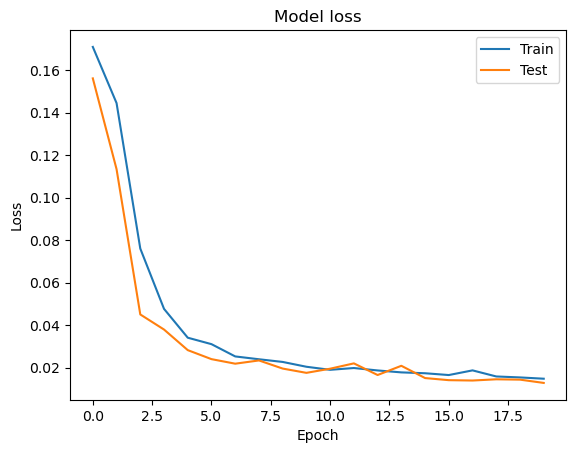

In [17]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


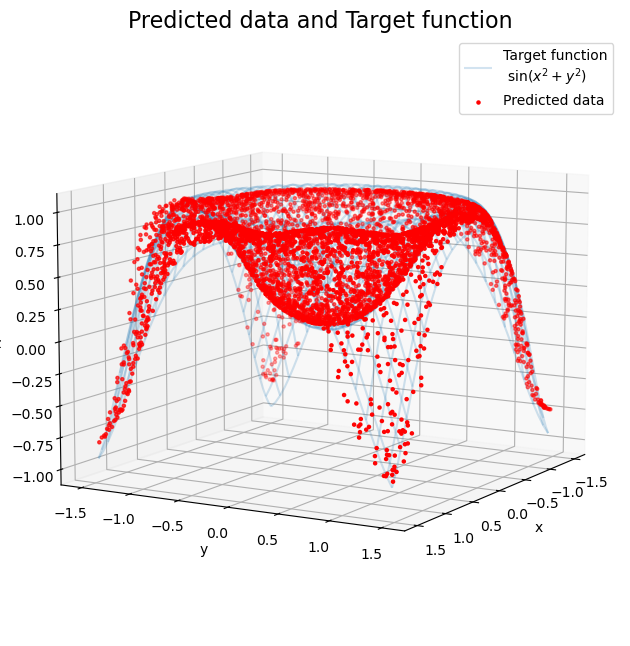

In [18]:
# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

x_predicted = np.random.uniform(-3./2, 3./2, 5000) 
y_predicted = np.random.uniform(-3./2, 3./2, 5000) 
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted)

# plot
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    label = 'Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label = 'Predicted data')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Predicted data and Target function", fontsize = 16)
ax.legend()
ax.view_init(10, 30)


plt.show()

The model seems to have succeeded in its goal of predicting data that reasonably fit the original function.